## What is HyperCoast?
HyperCoast streamlines the processing of hyperspectral data from existing spaceborne and airborne missions (e.g., PACE, EMIT, AVIRIS, NEON, and DESIS) and upcoming hyperspectral missions, such as, SBG and GLIMR.

https://hypercoast.org

<img src="https://i.imgur.com/HBMjW6o.gif" width="500" alt="HyperCoast Processing">

In [ ]:
# Install hypercoast, which is a published python package: https://anaconda.org/conda-forge/hypercoast
# %pip install hypercoast

In [ ]:
# import libraries
import hypercoast
import pandas as pd

In [ ]:
filepath = "PACE_OCI.20240730T181157.L2.OC_AOP.V2_0.NRT.nc"
kml_path = "GOM_Hypoxia.kml"


In [ ]:
filepath = "Hypoxia_Data_Sheet.xlsx"
df = pd.read_excel(filepath)
df.head()

In [ ]:
df_filtered = df.dropna(subset=['Lon', 'Lat']).reset_index(drop=True)
df_filtered.head()

In [ ]:
m = hypercoast.Map()
m.add_basemap("Hybrid")
wavelengths = [450, 550, 650]
m.add_pace(
    dataset, wavelengths, indexes=[3, 2, 1], vmin=0, vmax=0.02, layer_name="PACE"
)
m.add("spectral")
style = {"weight": 2, "color": "red"}
m.add_kml(kml_path, style=style, layer_name="Hypoxia Path", info_mode=None)
m.add_points_from_xy(df_filtered, x="Lon", y="Lat", max_cluster_radius=50, layer_name="Hypoxia Data Points")
m.set_center(-91.46118, 28.89758, zoom=8)
m

In [ ]:
dataset = hypercoast.read_pace(filepath)
da = dataset["Rrs"]
data = (da.sel(wavelength=650) > da.sel(wavelength=620)) & (da.sel(wavelength=701) > da.sel(wavelength=681)) & (da.sel(wavelength=701) > da.sel(wavelength=450))

In [ ]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Create a plot
fig, ax = plt.subplots(figsize=(12, 6), subplot_kw={'projection': ccrs.PlateCarree()})

#ax.set_extent([-93, -87, 28, 32], crs=ccrs.PlateCarree())

# Plot the data
data.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='coolwarm', cbar_kwargs={'label': 'Cyano'},)

# Add coastlines
ax.coastlines()

# Add state boundaries
states_provinces = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lines',
    scale='50m',
    facecolor='none')

ax.add_feature(states_provinces, edgecolor='gray')

# Optionally, add gridlines, labels, etc.
ax.gridlines(draw_labels=True)

plt.show()


## What you can do next about Cyanobacteria using PACE???

Spectral Angle Mapper: Spectral similarity 
Input: library of Cyanobacteria bloom Rrs spectra with Chla at different levels

Spectral Mixture Analysis: unmix different cyanobacteria species based on spectral difference.

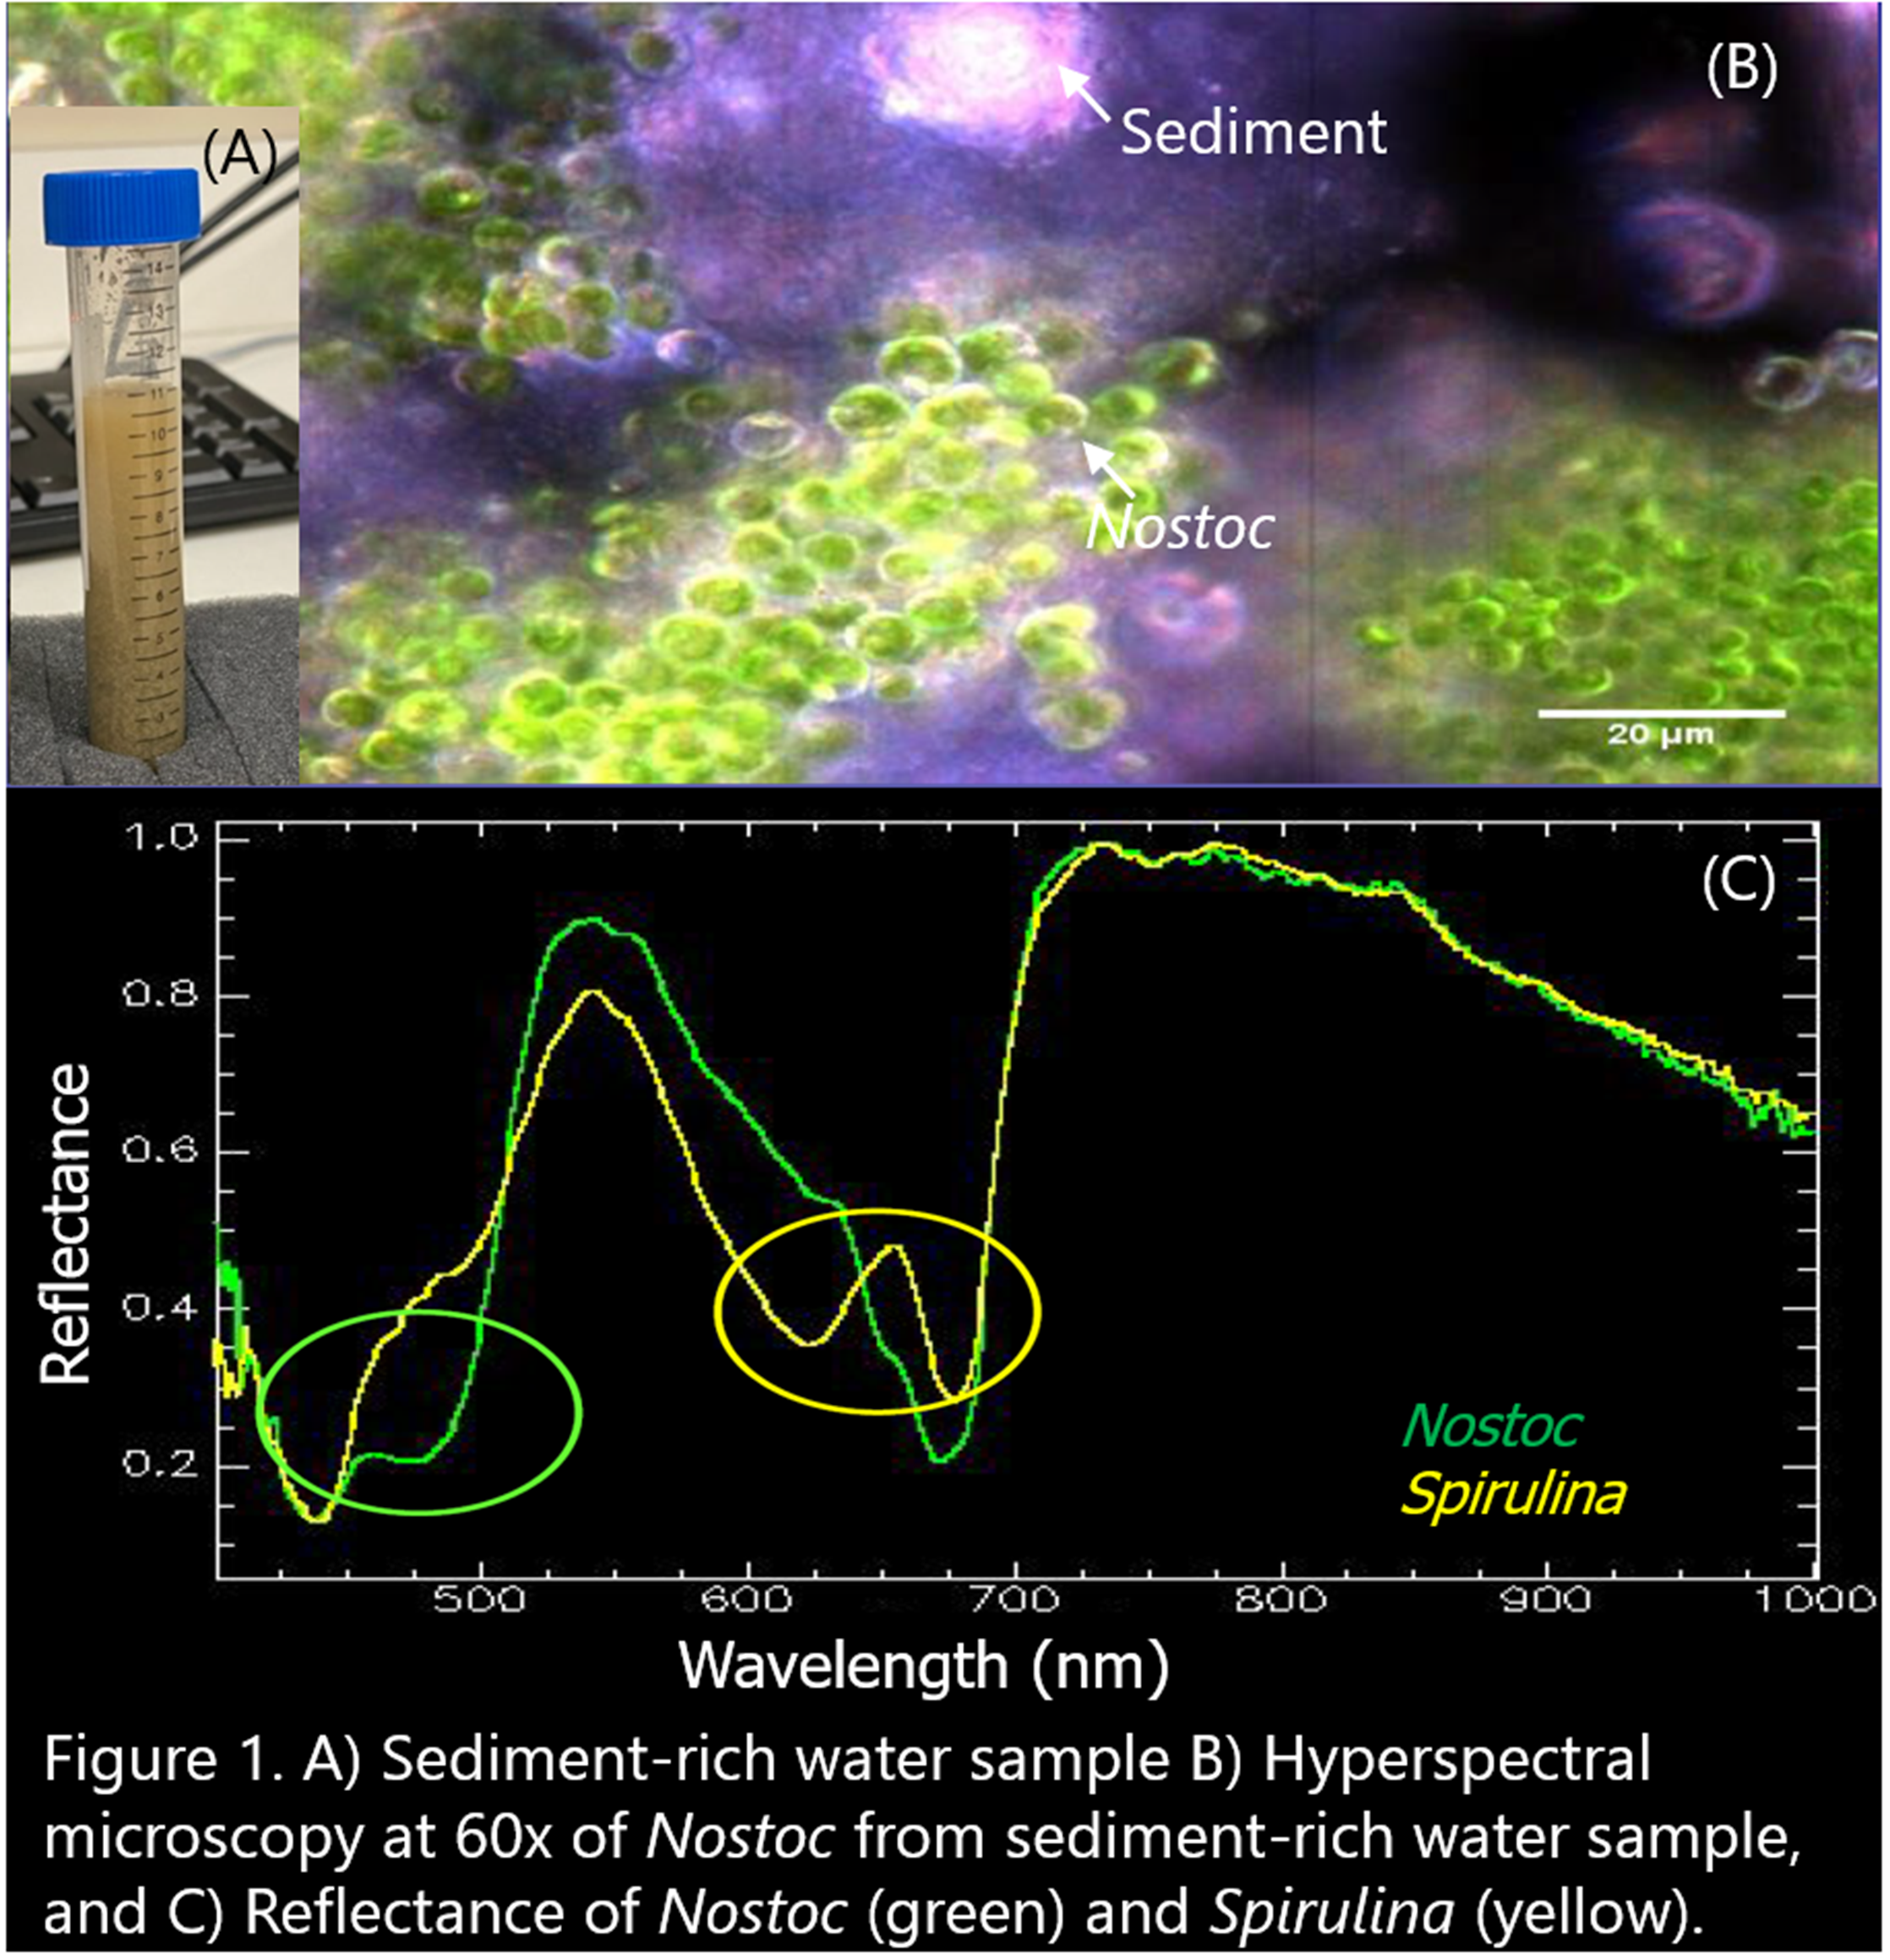